In [19]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

import sys
import os

OpenCV Version : 3.1.0 


In [73]:
src_path = "./export/"


def test(img_path):

    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img_gray, img_gray, mask=mask)
    ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY_INV)
    # for black text , cv.THRESH_BINARY_INV
    
    # Removing noise portions
    
    # to manipulate the orientation of dilution ,
    # large x means horizonatally dilating  more,
    # large y means vertically dilating more
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (12, 10))  
    print kernel
    # dilate , more the iteration more the dilation
    dilated = cv2.dilate(new_img, kernel, iterations=1)
    
    image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)  # cv3.x.x
    
    index = 1
    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 15 and h < 15:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
        index = index + 1
    
    # Write the image after apply opencv to do some ...
    cv2.imwrite(src_path + "thres.png", img)

test('dados/page1.jpg')

[[0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]]


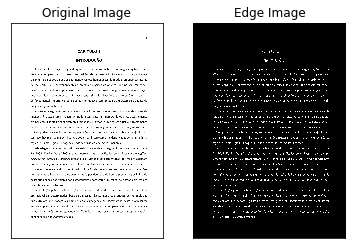

True

In [38]:
img = cv2.imread('page1.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite('export/foo.jpg', edges)

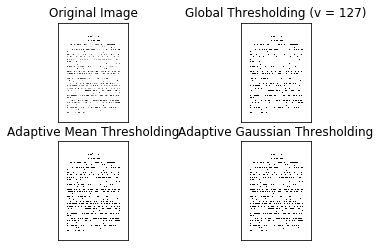

In [70]:
img = cv2.imread('page1.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    cv2.imwrite('example' + str(i) + '.jpg' , images[i])
plt.show()


In [71]:
def captch_ex(file_name):
    img = cv2.imread(file_name)

    img_final = cv2.imread(file_name)
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY_INV)  # for black text , cv.THRESH_BINARY_INV
    '''
            line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                         3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=1)  # dilate , more the iteration more the dilation
    
    # contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # get contours
    
    image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)  # cv3.x.x     
    
    index = 1
    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
        print(x,y)

        
#         #you can crop image and send to OCR  , false detected will return no text :)
#         cropped = img_final[y :y +  h , x : x + w]

#         s = file_name + '/crop_' + str(index) + '.jpg' 
#         cv2.imwrite(s , cropped)
        index = index + 1
        
    # write original image with added contours to disk
    # cv2.imshow('captcha_result', img)
    # cv2.waitKey()
    plt.title('Original Image')
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    # plt.savefig('example.png', dpi = 1000)
    plt.show()
    # print('is okay?')
